In [1]:
import sys 
sys.path.insert(0, '..')

In [2]:
import shutil
import os 

_outs = './test_outputs'
if os.path.exists(_outs):
    shutil.rmtree(_outs)

In [3]:
import os 
from typing import *
from importlib import import_module

import pandas as pd 
import numpy as np 
from process_bigraph import pp

from biosimulator_processes.api.compare import generate_comparison
from biosimulator_processes.io import read_report_outputs, standardize_report_outputs
from biosimulators_amici.core import exec_sedml_docs_in_combine_archive as exec_amici
from biosimulators_copasi.core import exec_sedml_docs_in_combine_archive as exec_copasi 
from biosimulators_tellurium.core import exec_sedml_docs_in_combine_archive as exec_tellurium
from biosimulators_utils.report.data_model import ReportFormat
from biosimulators_utils.config import Config

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [4]:
omex_source_dir = './examples/sbml-core'
omex_name = 'Elowitz-Nature-2000-Repressilator.omex'
omex_fp = os.path.join(omex_source_dir, omex_name)
out_dir = './test_outputs'

In [5]:
def generate_simulator_outputs(omex_fp: str, output_root_dir: str, simulators: list[str] = None) -> dict:
    if not os.path.exists(output_root_dir):
        os.mkdir(output_root_dir)
        
    output_data = {}
    sims = simulators or ['amici', 'copasi', 'tellurium']
    for sim in sims:
        module = import_module(name=f'biosimulators_{sim}.core')
        exec_func = getattr(module, 'exec_sedml_docs_in_combine_archive')
        
        sim_output_dir = os.path.join(output_root_dir, f'{sim}_outputs')
        if not os.path.exists(sim_output_dir):
            os.mkdir(sim_output_dir)
        
        sim_config = Config(LOG=False)
        exec_func(archive_filename=omex_fp, out_dir=sim_output_dir, config=sim_config)
        report_path = os.path.join(sim_output_dir, 'reports.h5')
        sim_data = read_report_outputs(report_path)
        output_data[sim] = sim_data
    
    return output_data
 

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505). The following is the 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'SIMILAR_VARIABLES'.

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505). The following is the 

 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505). The following is the 

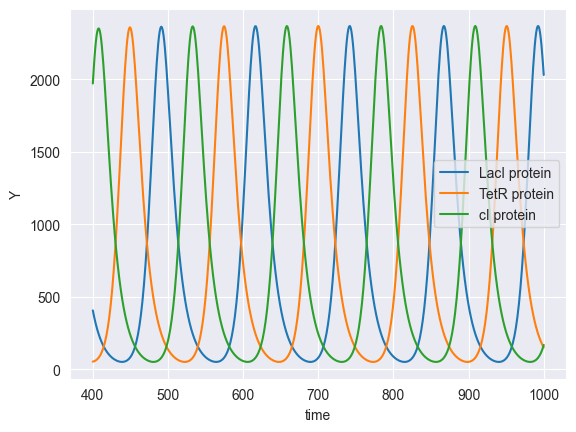

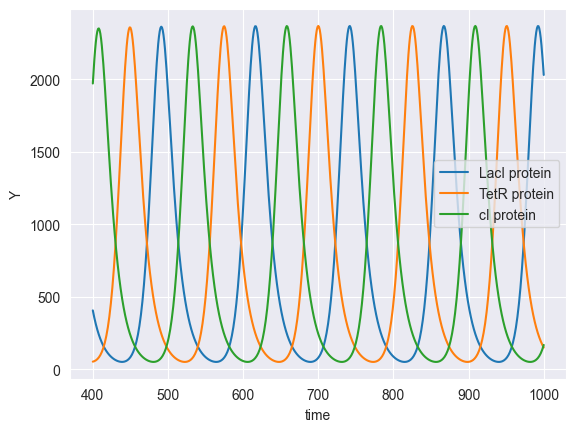

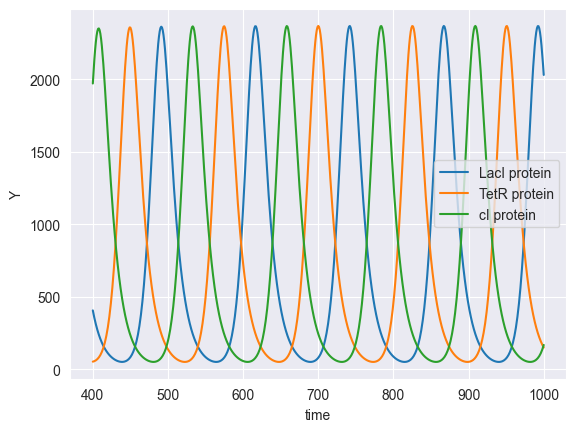

In [6]:
simulator_outputs = generate_simulator_outputs(omex_fp, output_root_dir='./test_outputs')

In [17]:
spec_index = 1
outs = [simulator_outputs['amici'].data[spec_index].data, simulator_outputs['copasi'].data[spec_index].data, simulator_outputs['tellurium'].data[spec_index].data]
simulator_names = list(simulator_outputs.keys())
simulator_names.append('ground_truth')

ground_truth_report_fp = os.path.join(omex_source_dir, omex_name.replace('.omex', ''), 'reports.h5')
ground_truth_results = standardize_report_outputs(ground_truth_report_fp)
ground_truth = ground_truth_results['floating_species']['LacI protein']
outs.append(ground_truth)
outs_df = pd.DataFrame(data=np.array(outs).transpose(), columns=simulator_names)

In [18]:
ground_truth_results['floating_species'].keys()

dict_keys(['LacI protein', 'TetR protein', 'cI protein', 'LacI mRNA', 'TetR mRNA', 'cI mRNA'])

In [19]:
read_report_outputs(ground_truth_report_fp)

BiosimulationsRunOutputData(report_path='./examples/sbml-core/Elowitz-Nature-2000-Repressilator/reports.h5', data=[BiosimulationsReportOutput(dataset_label='Time', data=array([ 400.,  401.,  402.,  403.,  404.,  405.,  406.,  407.,  408.,
        409.,  410.,  411.,  412.,  413.,  414.,  415.,  416.,  417.,
        418.,  419.,  420.,  421.,  422.,  423.,  424.,  425.,  426.,
        427.,  428.,  429.,  430.,  431.,  432.,  433.,  434.,  435.,
        436.,  437.,  438.,  439.,  440.,  441.,  442.,  443.,  444.,
        445.,  446.,  447.,  448.,  449.,  450.,  451.,  452.,  453.,
        454.,  455.,  456.,  457.,  458.,  459.,  460.,  461.,  462.,
        463.,  464.,  465.,  466.,  467.,  468.,  469.,  470.,  471.,
        472.,  473.,  474.,  475.,  476.,  477.,  478.,  479.,  480.,
        481.,  482.,  483.,  484.,  485.,  486.,  487.,  488.,  489.,
        490.,  491.,  492.,  493.,  494.,  495.,  496.,  497.,  498.,
        499.,  500.,  501.,  502.,  503.,  504.,  505.,  506.

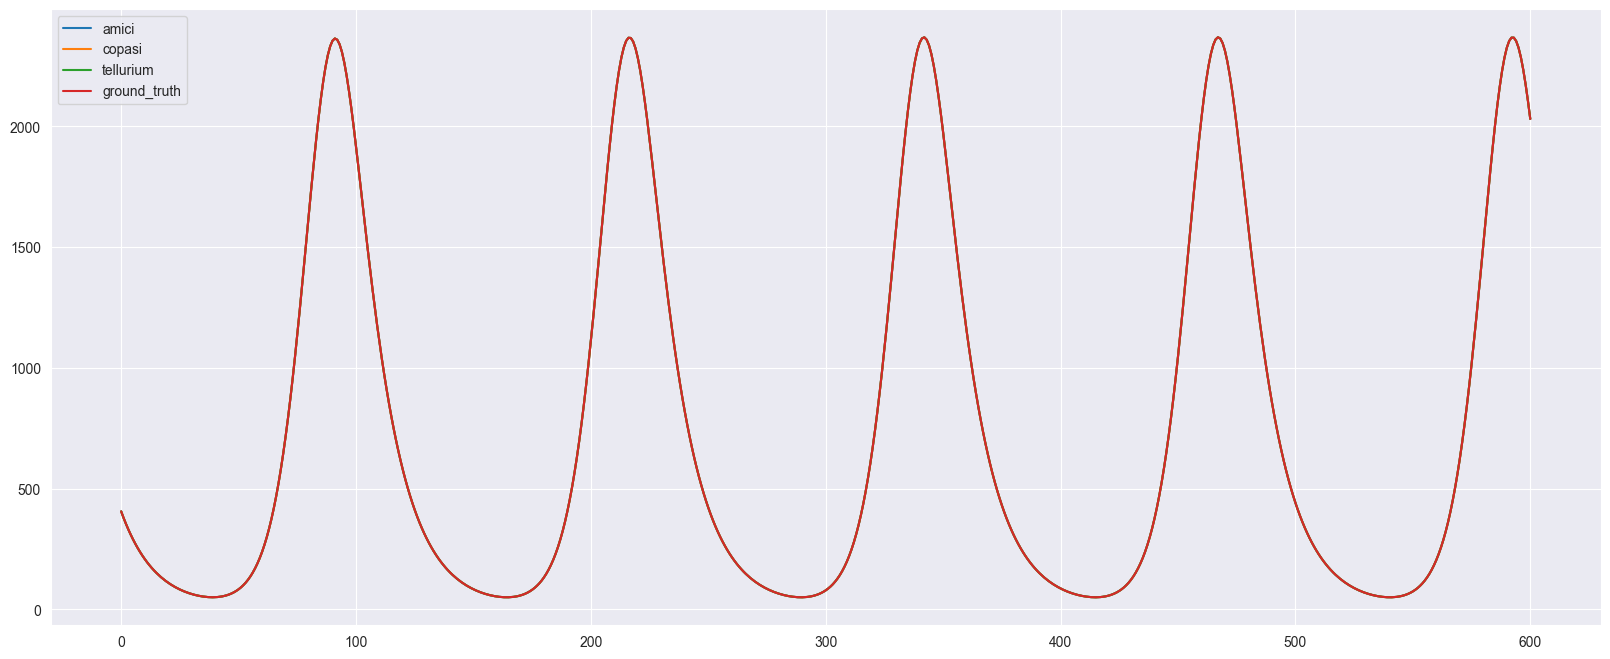

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 8))
for i, name in enumerate(simulator_names):
    sns.lineplot(data=outs[i], label=name)
plt.legend()
plt.grid(True)
plt.show()

In [23]:
def calculate_mse(a, b) -> int:
    return np.mean((a - b) ** 2)


def compare_arrays(arr1: np.ndarray, arr2: np.ndarray, atol=None, rtol=None) -> bool:
    """Original methodology copied from biosimulations runutils."""
    max1 = max(arr1)
    max2 = max(arr2)
    aTol = atol or max(1e-3, max1*1e-5, max2*1e-5)
    rTol = rtol or 1e-4
    return np.allclose(arr1, arr2, rtol=rTol, atol=aTol)

In [35]:
def generate_matrix_data(
    outputs: List[np.ndarray],
    simulators: List[str],
    method: Union[str, any] = 'prox',
    rtol: float = None,
    atol: float = None,
    ground_truth: np.ndarray = None
    ) -> pd.DataFrame:
    """Generate a Mean Squared Error comparison matrix of arr1 and arr2, indexed by simulators by default,
        or an AllClose Tolerance routine result if `method` is set to `prox`.

        Args:
            outputs: list of output arrays.
            simulators: list of simulator names.
            method: pass one of either: `mse` to perform a mean-squared error calculation
                or `prox` to perform a pair-wise proximity tolerance test using `np.allclose(outputs[i], outputs[i+1])`.
            rtol:`float`: relative tolerance for comparison if `prox` is used.
            atol:`float`: absolute tolerance for comparison if `prox` is used.
            ground_truth: If passed, this value is compared against each simulator in simulators. Currently, this
                field is agnostic to any verified/validated source, and we trust that the user has verified it. Defaults
                to `None`.

        Returns:
            Pandas dataframe representing a comparison matrix where `i` and `j` are both indexed by the
                simulators involved. The aforementioned simulators involved will also include the `ground_truth` value
                within the indices if one is passed.
    """

    # TODO: map arrs to simulators more tightly.
    _simulators = simulators.copy()
    _outputs = outputs.copy()
    if ground_truth is not None:
        _simulators.append('ground_truth')
        _outputs.append(ground_truth)

    use_tol_method = method.lower() == 'prox'
    matrix_dtype = np.float64 if not use_tol_method else bool
    num_simulators = len(_simulators)
    mse_matrix = np.zeros((num_simulators, num_simulators), dtype=matrix_dtype)

    # fill the matrices with the calculated values
    for i in range(len(_simulators)):
        for j in range(i, len(_simulators)):
            output_i = _outputs[i]
            output_j = _outputs[j]
            method_type = method.lower()
            result = calculate_mse(output_i, output_j) if method_type == 'mse' else compare_arrays(arr1=output_i, arr2=output_j, rtol=rtol, atol=atol)
            
            mse_matrix[i, j] = result
            if i != j:
                mse_matrix[j, i] = mse_matrix[i, j]
                
    return pd.DataFrame(mse_matrix, index=_simulators, columns=_simulators)

In [36]:
prox_matrix = generate_matrix_data(outputs=outs, simulators=['amici', 'copasi', 'tellurium'], ground_truth=ground_truth, method='prox')

prox_matrix

,amici,copasi,tellurium,ground_truth
amici,True,True,True,True
copasi,True,True,True,True
tellurium,True,True,True,True
ground_truth,True,True,True,True


<Axes: >

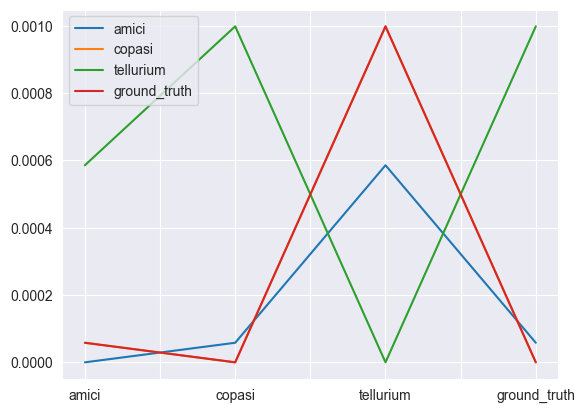

In [37]:
prox_matrix = generate_matrix_data(outputs=outs, simulators=['amici', 'copasi', 'tellurium'], ground_truth=ground_truth, method='mse')

prox_matrix.plot()

In [38]:
prox_matrix
    

,amici,copasi,tellurium,ground_truth
amici,0.000000,5.813716e-05,0.000585,5.813762e-05
copasi,0.000058,0.000000e+00,0.000998,2.381557e-15
tellurium,0.000585,9.979981e-04,0.000000,9.980000e-04
ground_truth,0.000058,2.381557e-15,0.000998,0.000000e+00


In [32]:
def calculate_mse(a, b) -> int:
    return np.mean((a - b) ** 2)

calculate_mse(3, 3)

0.0

In [33]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

In [34]:
calculate_mse(, y)

0.0